In [1]:
from LFC.Hardware import *
import numpy as np
# fg = FG('rp-f0602c.local')
# rp_fc = RedPitaya('rp-f072a9.local')
# fg.connect()


# rp_fc.connect()
# fin = lambda x: np.mean(rp_fc.acquire(port = 1))
# fout = lambda y: rp_fc.dc(port = 2, offset = y)
# fc_lock = Servo(fin, fout, name = 'Filter Cavity lock')

In [2]:
# fg = FG('rp-f072ec.local')
# fg.connect()

rp_svo = RedPitaya('rp-f072ec.local')
rp_svo.connect()

Red Pitaya connected


1

In [17]:
rp_svo.connected

True

In [5]:
rp_svo.signalGenerator(freq=1/10e-6, outEnable=True)

'ON'

In [60]:
rp_svo.signalGenerator(port=1, freq=500, outEnable=True)

'ON'

In [59]:
rp_svo.signalGenerator(port=1, func='DC', amp=0.0 ,offset=0.5, outEnable=True)

'ON'

In [94]:
rp_svo.dc(port=1, offset=1)

In [191]:
import matplotlib.pyplot as plt
plt.plot(rp_svo.acquire(port=1))

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [104]:
out1 = np.linspace(-1,1,21)
detect1 = np.zeros(21)
for ii,V in enumerate(out1):
    rp_svo.dc(port=1, offset=V)
    detect1[ii] = np.mean(rp_svo.acquire(port = 1))

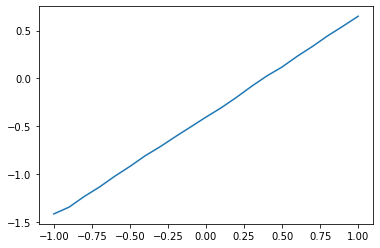

In [106]:
plt.plot(out1,detect1)

In [30]:
rp_svo.startosc(port=1)

In [134]:
fin = lambda x: np.mean(rp_svo.acquire(port = 1))
fout = lambda y: rp_svo.dc(port = 1, offset = y)
fc_lock = Servo(fin, fout, name = 'Filter Cavity lock')
fc_lock.P = 0.05


Filter Cavity lock started


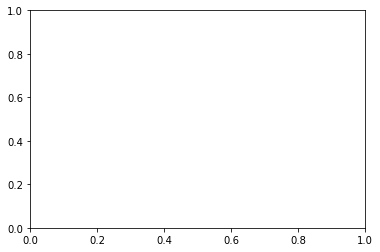

In [135]:
# fc_lock.start(0.3, -0.8, [-1,1])
fc_lock.start(0.5, 0, [-1,1])

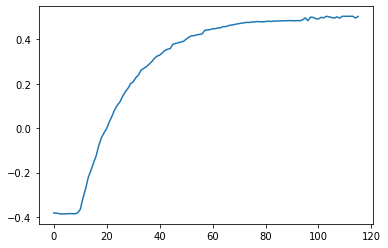

Locked:True, x:0.5034670996592467, y:0.8463663001572767


In [189]:
fc_lock.plot()

In [190]:
fc_lock.stop()

Filter Cavity lock stoped


In [113]:
class Tolock_dummy(object):
    def __init__(self):
        self.x = 0
        
    @property
    def y(self):
        return self.x-0.4
    
    def set_x(self,x):
        self.x = x
        
H = Tolock_dummy()

In [127]:
fin_dummy = lambda x: H.y
fout_dummy = lambda y: H.set_x(y)
fc_lock_dummy = Servo(fin_dummy, fout_dummy, name = 'Dummy lock test')

Dummy lock test started


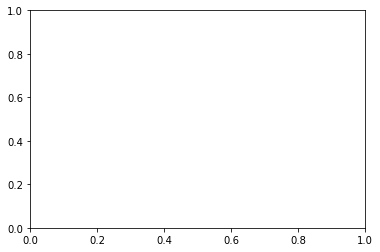

In [132]:
fc_lock_dummy.P = 0.05

fc_lock_dummy.start(0.5, 0, [-1,1])



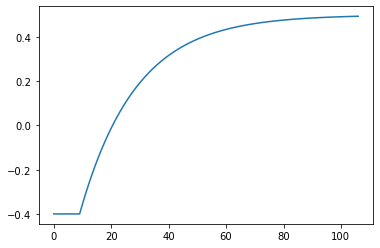

Locked:False, x:0.4951910501407838, y:0.8954314976337446


In [133]:
fc_lock_dummy.plot()

In [131]:
fc_lock_dummy.stop()
print(H.x)
H.x = 0

Dummy lock test stoped
0.8999999999951874


In [99]:
H.set_x(0.6)
H.x

0.6

In [98]:
import threading
def print_Hx(H):
    print(H.x)
    
x = threading.Thread(print_Hx(H))
x.start

0.4


<bound method Thread.start of <Thread(Thread-10, initial)>>

In [7]:
rp_svo.stoposc()

Exception in thread Thread-5 (osc):
Traceback (most recent call last):
  File "C:\Users\Maodong\Anaconda3\envs\lfc-env\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "C:\Users\Maodong\Anaconda3\envs\lfc-env\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "Z:\Maodong\Projects\Keck\Keck Comb\LFC\Hardware\RedPitaya.py", line 81, in osc
    y = self.acquire(port)
  File "Z:\Maodong\Projects\Keck\Keck Comb\LFC\Hardware\RedPitaya.py", line 58, in acquire
    if self.read() == 'TD':
  File "Z:\Maodong\Projects\Keck\Keck Comb\LFC\Hardware\RedPitaya.py", line 28, in read
    return self.inst.rx_txt()
  File "Z:\Maodong\Projects\Keck\Keck Comb\LFC\Hardware\RedPitaya.py", line 311, in rx_txt
    chunk = self._socket.recv(chunksize + len(self.delimiter)).decode(
TimeoutError: timed out


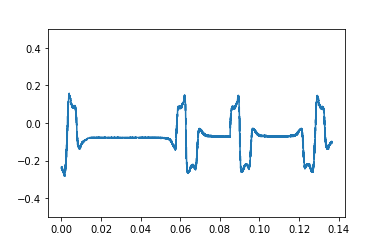